## Student Performance Indicator


> #### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model


> ### Import data and required libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

C:\Users\singh\AppData\Local\Temp\ipykernel_21556\5259064.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


> ### Importing the raw data


In [3]:
df = pd.read_csv('data/raw.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [4]:
# Shape of the Dataset
df.shape

(1001, 8)

> #### Dataset information

- Gender : sex of students (Male\female)
- race_ethnicity : ethnicity of students (Group A, B, C, D, E)
- Parental_level_of_education : Parents level of education ( bachelor's degree, some college, master's degree, associate's degree)
- lunch : lunch of students ( standard, free/reduced)
- test_preparation_course : test preparation course of students before test ( complete or not)
- math_score : Maths test score
- reading_score : reading test score
- writing_score : writing test score


> ### Data Checks

- Check Missing values
- Check duplicate values
- Check Data types
- Check unique values
- Check stats of the dataset
- Check various categories present in each column


In [5]:
df.isna().sum()

gender                         1
race_ethnicity                 1
parental_level_of_education    1
lunch                          1
test_preparation_course        1
math_score                     1
reading_score                  1
writing_score                  1
dtype: int64

- There's 1 missing value in the dataset


In [6]:
df.dropna(axis=0,inplace=True)

- Dropping the missing value column because there's only 1 missing values row


In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- No missing values


In [8]:
df.duplicated().sum()

0

- No duplicate values in the dataset


> ##### Checking Data types


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   float64
 6   reading_score                1000 non-null   float64
 7   writing_score                1000 non-null   float64
dtypes: float64(3), object(5)
memory usage: 70.3+ KB


> ### Checking number of unique values in each column


In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

> #### Checking stats of the dataset


In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights

- Count: Data for 1000 students in each category.
- Mean: Average scores are 66.89 (math), 69.17 (reading), and 68.05 (writing).
- Standard Deviation: Scores vary with a standard deviation of around 15 for all categories.
- Minimum: Lowest scores are 0 (math), 17 (reading), and 10 (writing).
- Percentiles: 25th, 50th (median), and 75th percentiles increase from math to reading to writing.
- Maximum: Highest score in each category is 100.


## Exploring Data


In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [13]:
print("Categories in 'gender' variable: ",end=' ')
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end=' ')
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ",end=' ')
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end=' ')
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ",end=' ')
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [14]:
#The code is creating two lists: `numeric_features` and `categorical_features`.
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# printing number of numeric and categorical features
print(f'We have {len(numeric_features)} numerical features: {numeric_features}')
print(f'We have {len(categorical_features)} categorical features: {categorical_features}')

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "Total Score" and "Average"


In [15]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,218.0,72.666667
1,female,group C,some college,standard,completed,69.0,90.0,88.0,247.0,82.333333
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,278.0,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,148.0,49.333333
4,male,group C,some college,standard,none,76.0,78.0,75.0,229.0,76.333333


In [16]:
math_full = df[df['math_score'] == 100]['average'].count()
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
## print
print(f'The number of students with full marks in maths: {math_full}')
print(f'The number of students with full marks in reading: {reading_full}')
print(f'The number of students with full marks in writing: {writing_full}')

The number of students with full marks in maths: 7
The number of students with full marks in reading: 17
The number of students with full marks in writing: 14


#### Insights

- 7 students scored full marks in Math, 17 in Reading, and 14 in Writing.
- Reading had the highest number of top scorers.


### Exploring Data ( Visualization )


> ### Histogram and KDE


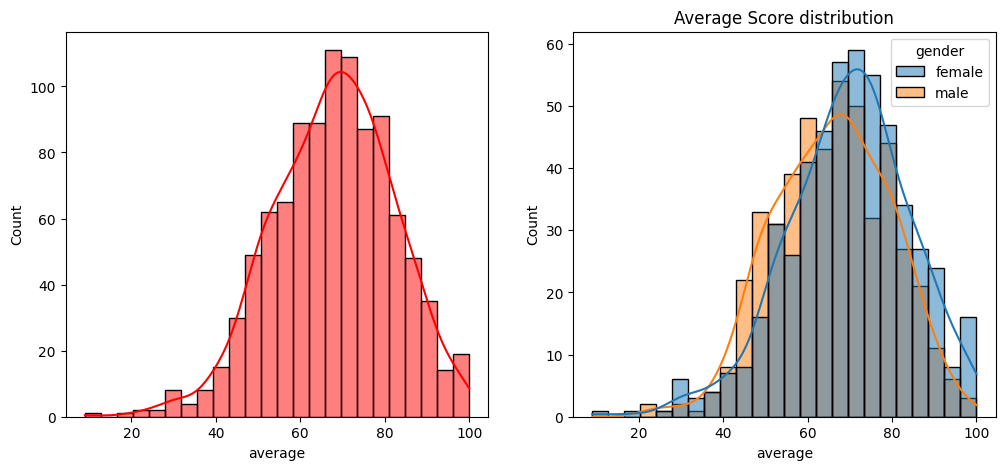

In [17]:
fig, axs = plt.subplots(1,2,figsize=(12,5))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.title('Average Score distribution')
plt.show()

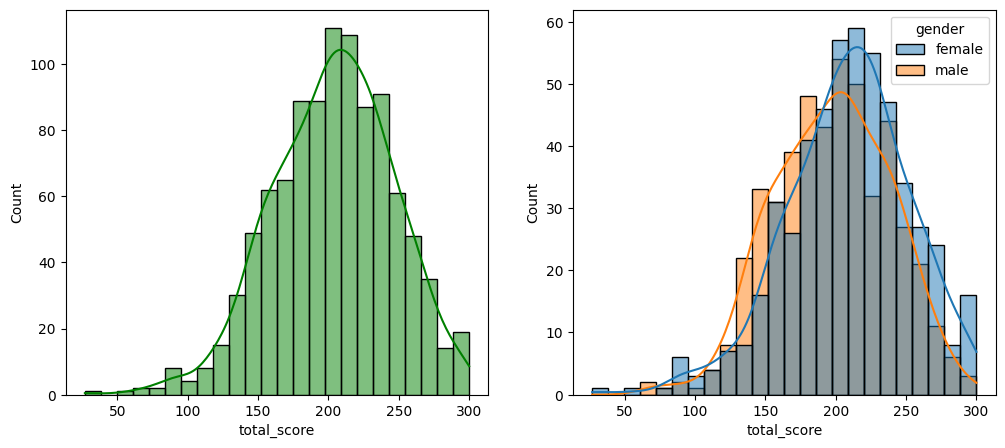

In [18]:
fig, axs = plt.subplots(1,2,figsize=(12,5))
plt.subplot(121)
sns.histplot(data=df,x='total_score',kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

#### Insights

- Female students tend to perform better than male students


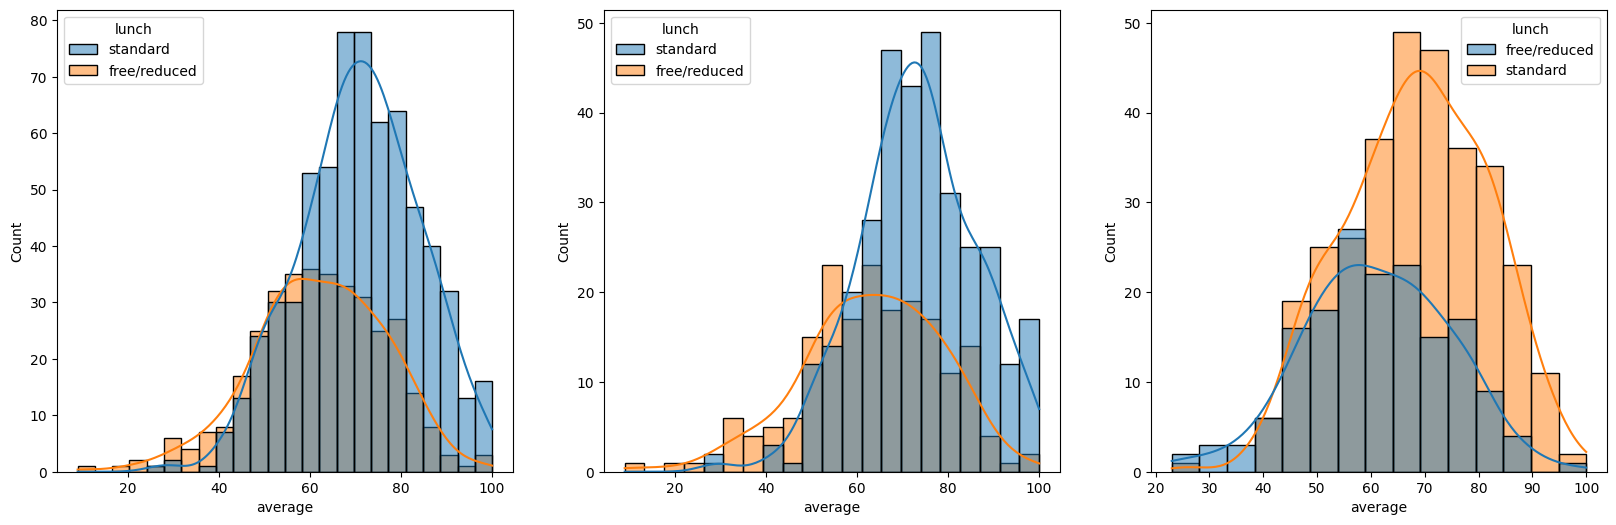

In [19]:
fig, axs = plt.subplots(1,3,figsize=(20,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

### Insights

- Standard lunch helps to perform better in exams for both male and female students


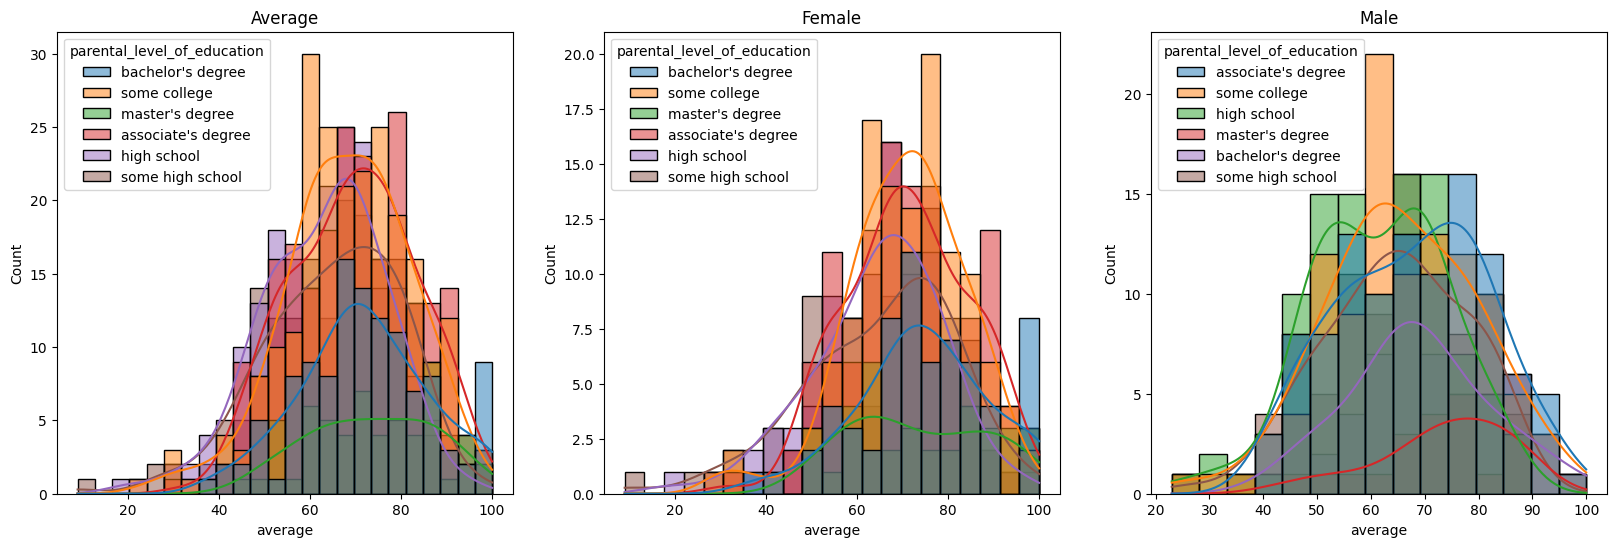

In [20]:
fig, axs = plt.subplots(1,3,figsize=(20,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.title('Average')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'],x='average',kde=True,hue='parental_level_of_education')
plt.title('Female')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'],x='average',kde=True,hue='parental_level_of_education')
plt.title('Male')
plt.show()

#### Insights

- It seems , Parents level of education doesn't seem to affect studensts test scores.
- In 2nd Plot , we can see that there's no affect on female students whether their parents education level is master's degree or bachelor's degree
- In 3rd plot , we can see that there's no affect on male students score because of their parent's education level


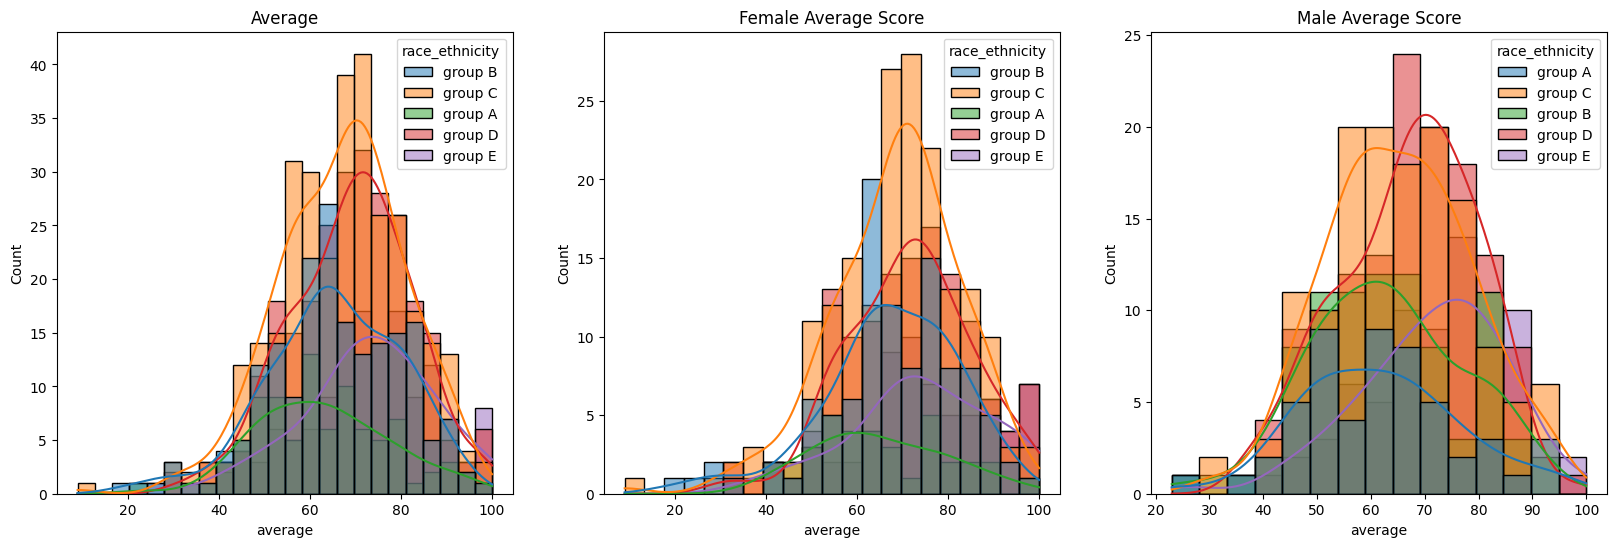

In [21]:
fig, axs = plt.subplots(1,3,figsize=(20,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.title('Average')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'],x='average',kde=True,hue='race_ethnicity')
plt.title('Female Average Score')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'],x='average',kde=True,hue='race_ethnicity')
plt.title('Male Average Score')
plt.show()

#### Insights

- On average , it seems students from race ethnicity group C and group D , tend to perform better than the rest of the groups
- And from all the plots , it can be seen that students from Group A and group E , tend to perform bad in tests than the rest of the groups


### Maximum score of all students in all three subjects


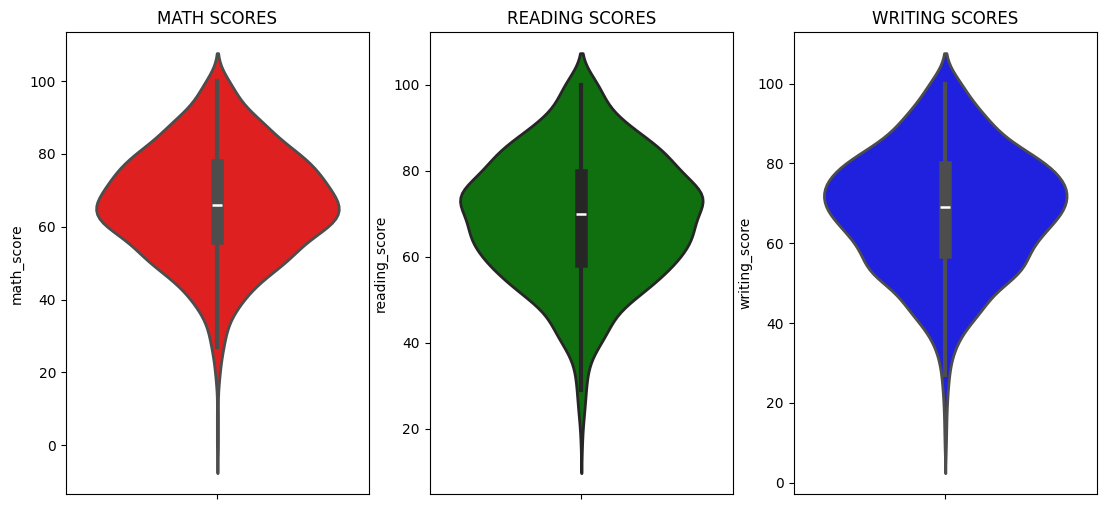

In [22]:
plt.figure(figsize=(18,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=2)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=2)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=2)
plt.show()

#### Insights

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80


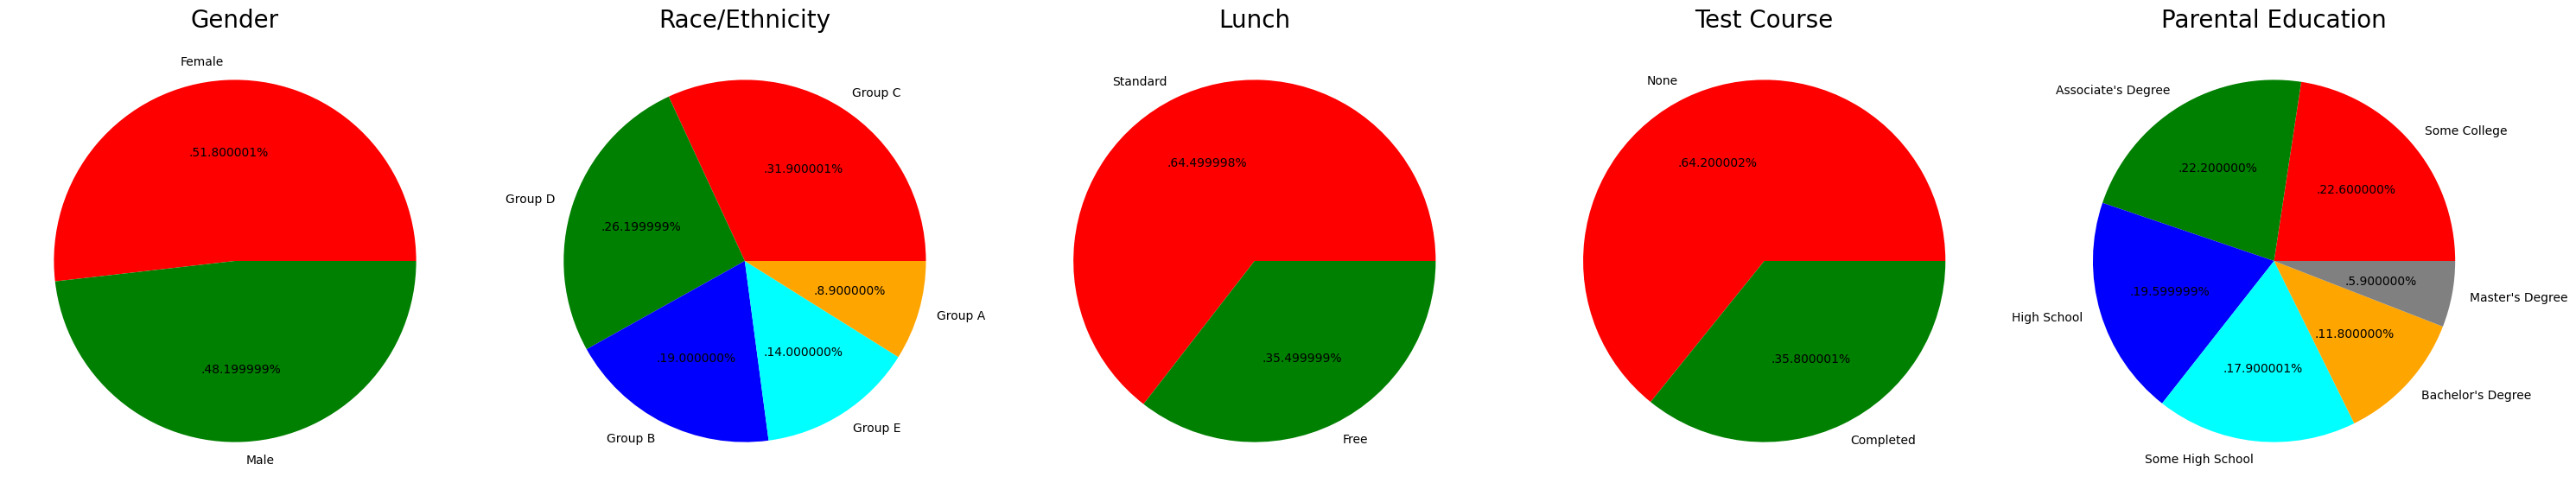

In [23]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

##### Insights

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"


#### Feature Wise Visualization

#### GENDER COLUMN

- How is distribution of Gender ?
- Is gender has any impact on student's performance ?


##### Univariate Analysis ( How is gender distributed?)


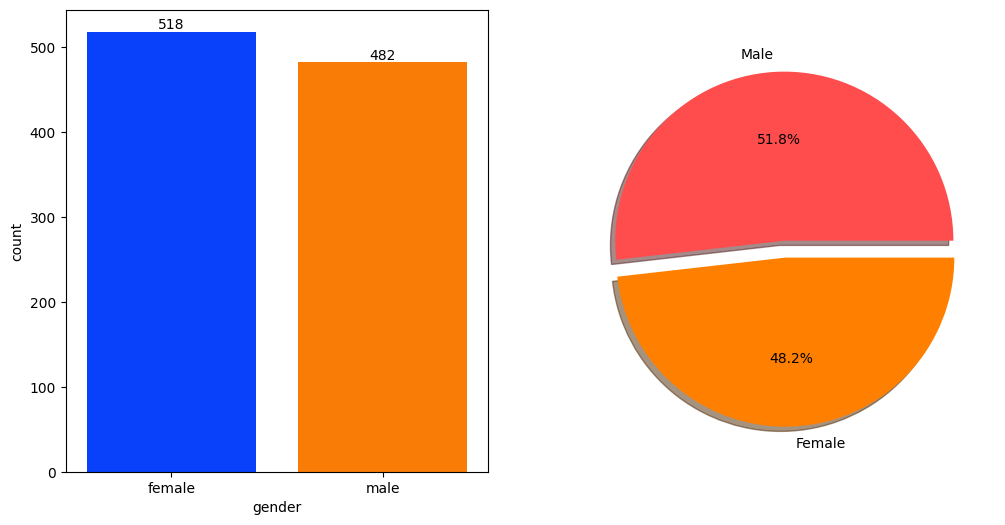

In [24]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

##### Insights

- Gender has almost balanced data with 518 (48.2% ) Female students and 482 (51.8%) Male students


#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

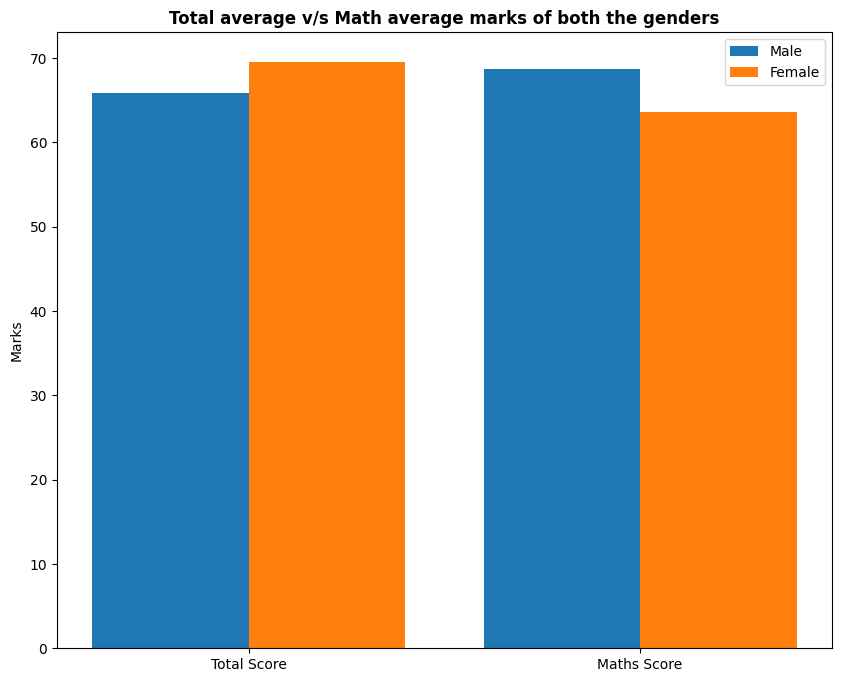

In [25]:
gender_group = df.groupby('gender')
plt.figure(figsize=(10,8))
X = ['Total Score', 'Maths Score']

female_scores = [gender_group['average'].mean()[0],gender_group['math_score'].mean()[0]]
male_scores = [gender_group['average'].mean()[1],gender_group['math_score'].mean()[1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


### Insights
- Female students tend to perform overall better than male students
- Male students seems to be performing better in maths test than female students

### Race/Ethnicity Column
- How is group wise distribution?
- Does race/ethnicity has any impact on student's performanace?

##### Univariate Analysis (Race/Ethnicity Column)
- Group wise distribution

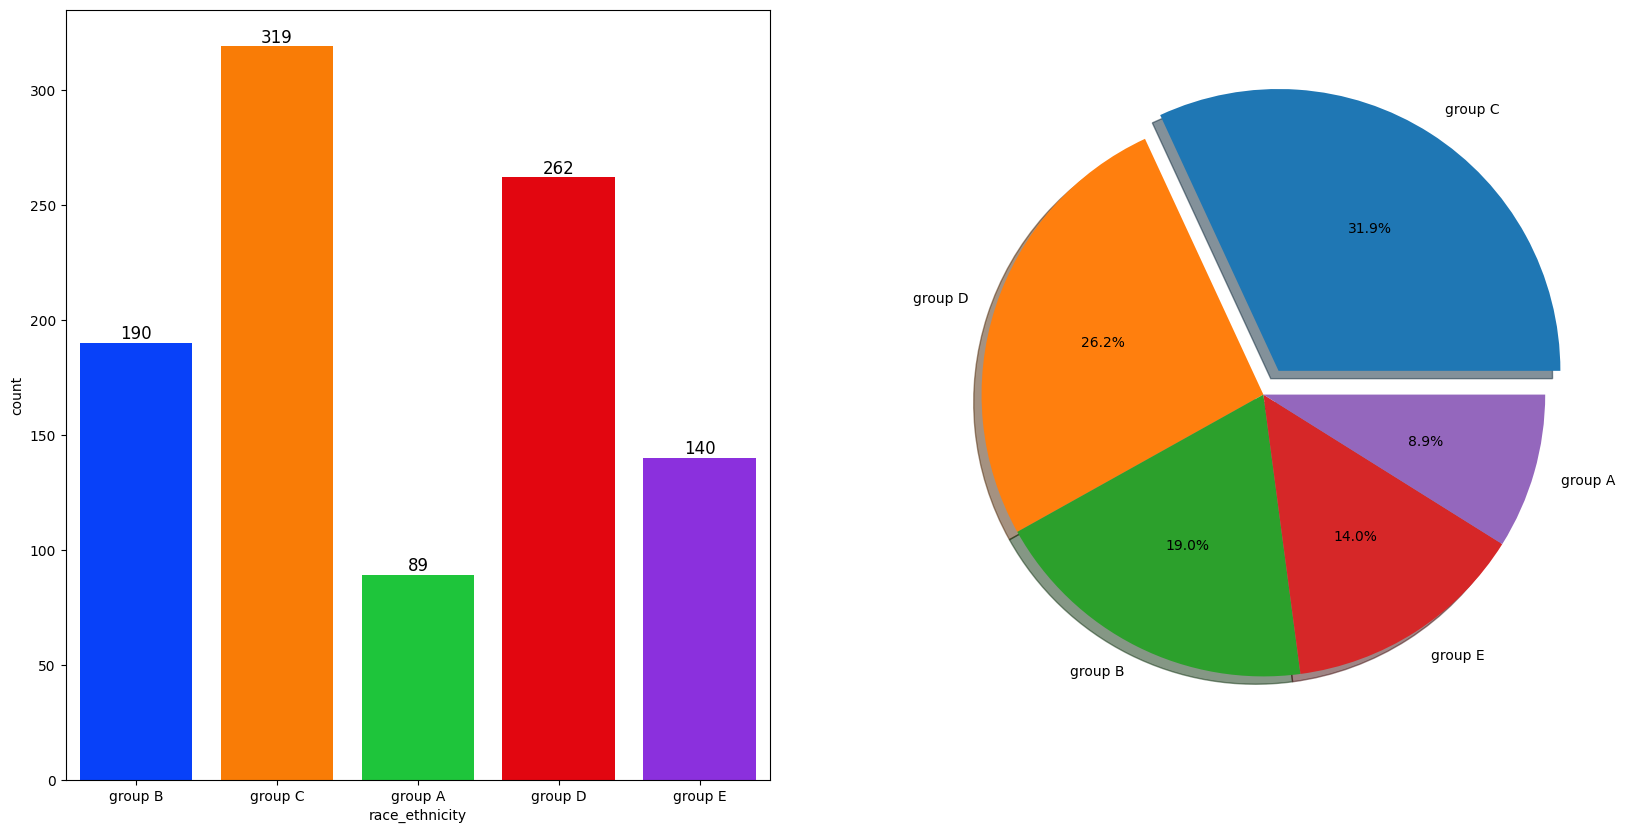

In [27]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=df,x='race_ethnicity',palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=12)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,autopct='%1.1f%%',explode=(0.1,0,0,0,0),shadow=True)
plt.show()

#### Insights
- Highest number of students belong from Group C and Group D
- Lowest number of students belong from Group A

#### Bivariate Analysis
- Does race/ethnicity has any impact on student's performance?

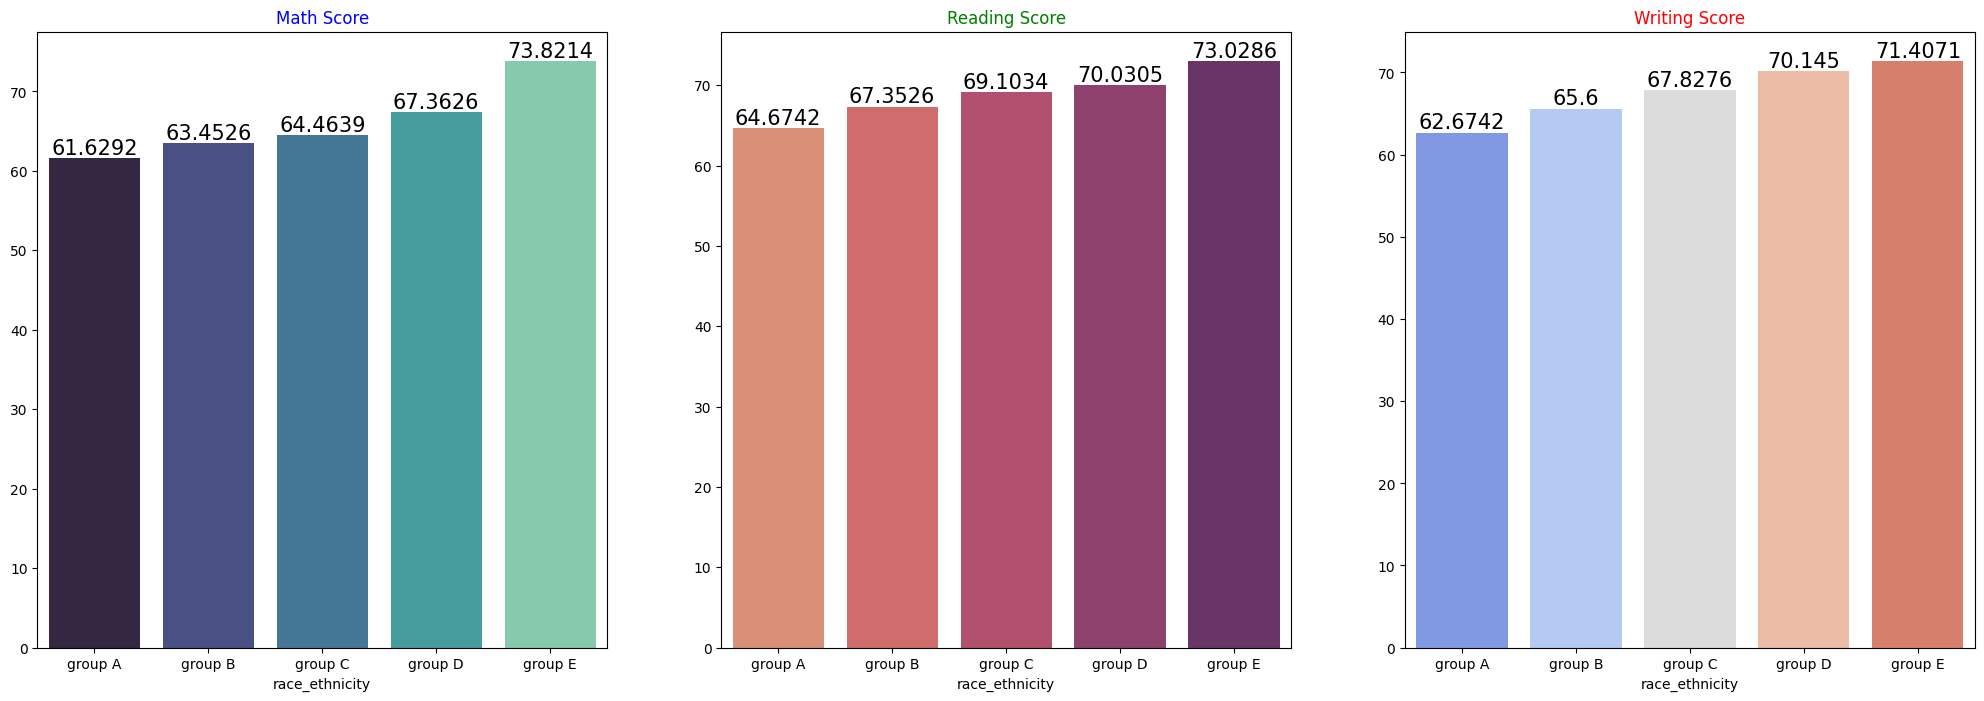

In [44]:
race = df.groupby('race_ethnicity')
fig,axs = plt.subplots(1,3,figsize=(25,8))

sns.barplot(x=race['math_score'].mean().index,y=race['math_score'].mean().values,palette='mako',ax=axs[0])
axs[0].set_title('Math Score',color='b',size=12)
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=15)
    
sns.barplot(x=race['reading_score'].mean().index,y=race['reading_score'].mean().values,palette='flare',ax=axs[1])
axs[1].set_title('Reading Score',color='g',size=12)
for container in axs[1].containers:
    axs[1].bar_label(container,color='black',size=15)
    
sns.barplot(x=race['writing_score'].mean().index,y=race['writing_score'].mean().values,palette='coolwarm',ax=axs[2])
axs[2].set_title('Writing Score',color='r',size=12)
for container in axs[2].containers:
    axs[2].bar_label(container,color='black',size=15)
plt.show()

#### Insights
- Group E have scored highest in all tests
- Group A has scored lowest in all tests
- Students from Group C have scored average in all tests

####  PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

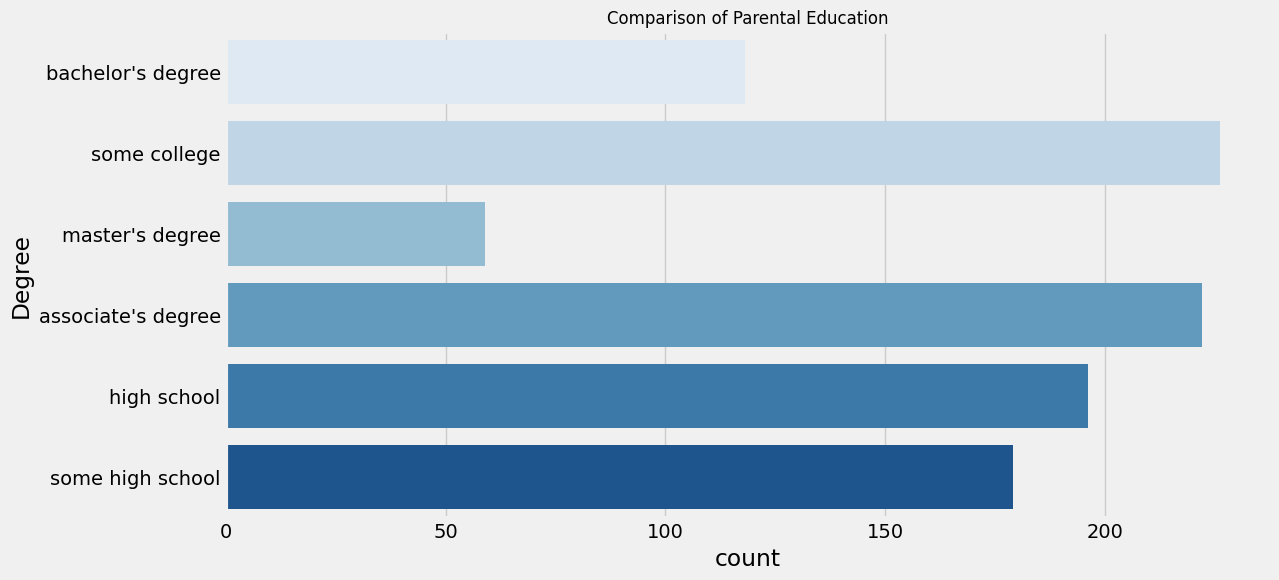

In [53]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 12)
plt.xlabel('count')
plt.ylabel('Degree')
plt.show()

#### Insights 
- Largest number of parents are from some college.

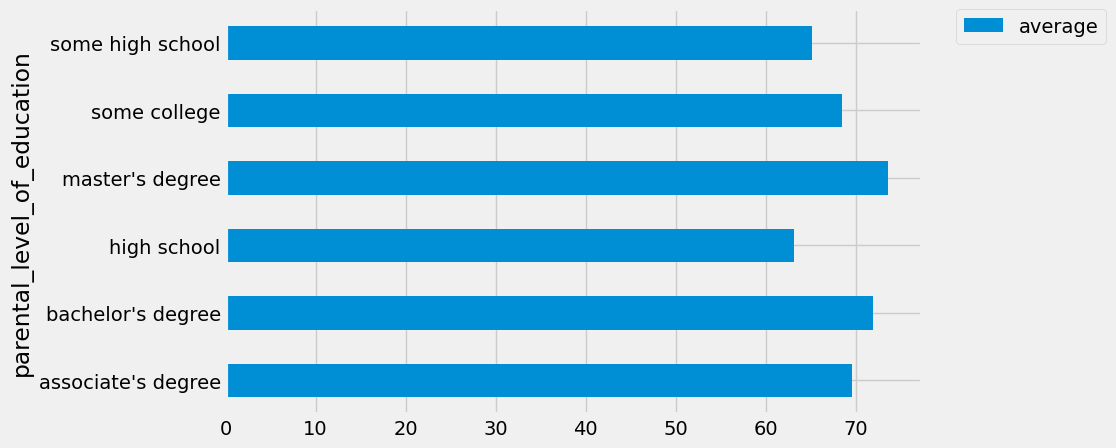

In [58]:
df.groupby('parental_level_of_education')['average'].agg('mean').plot(kind='barh',figsize=(8,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### Checking Outliers

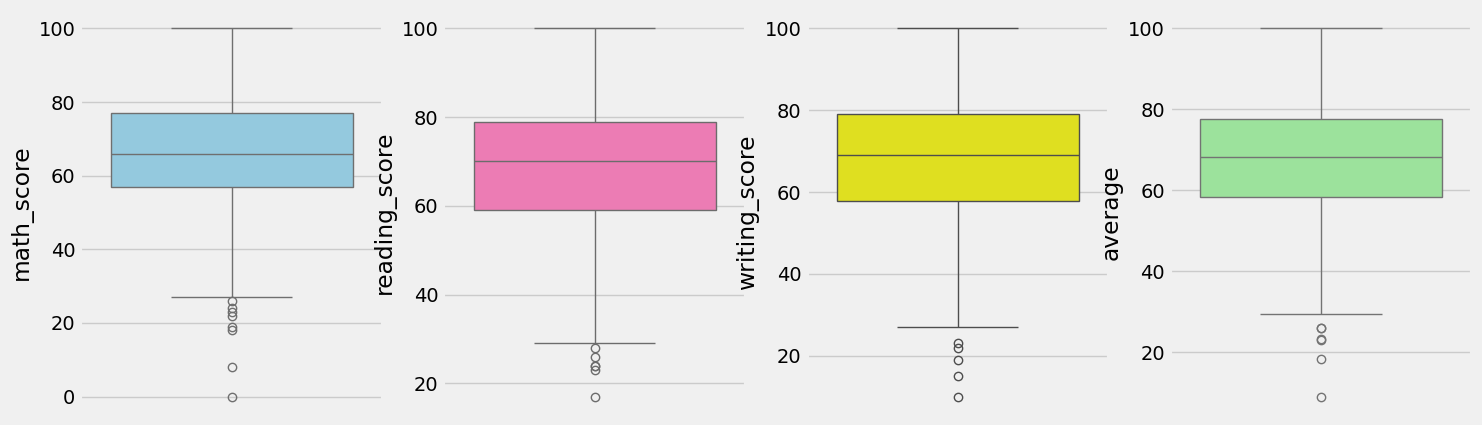

In [60]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### MUTIVARIATE ANALYSIS USING PAIRPLOT

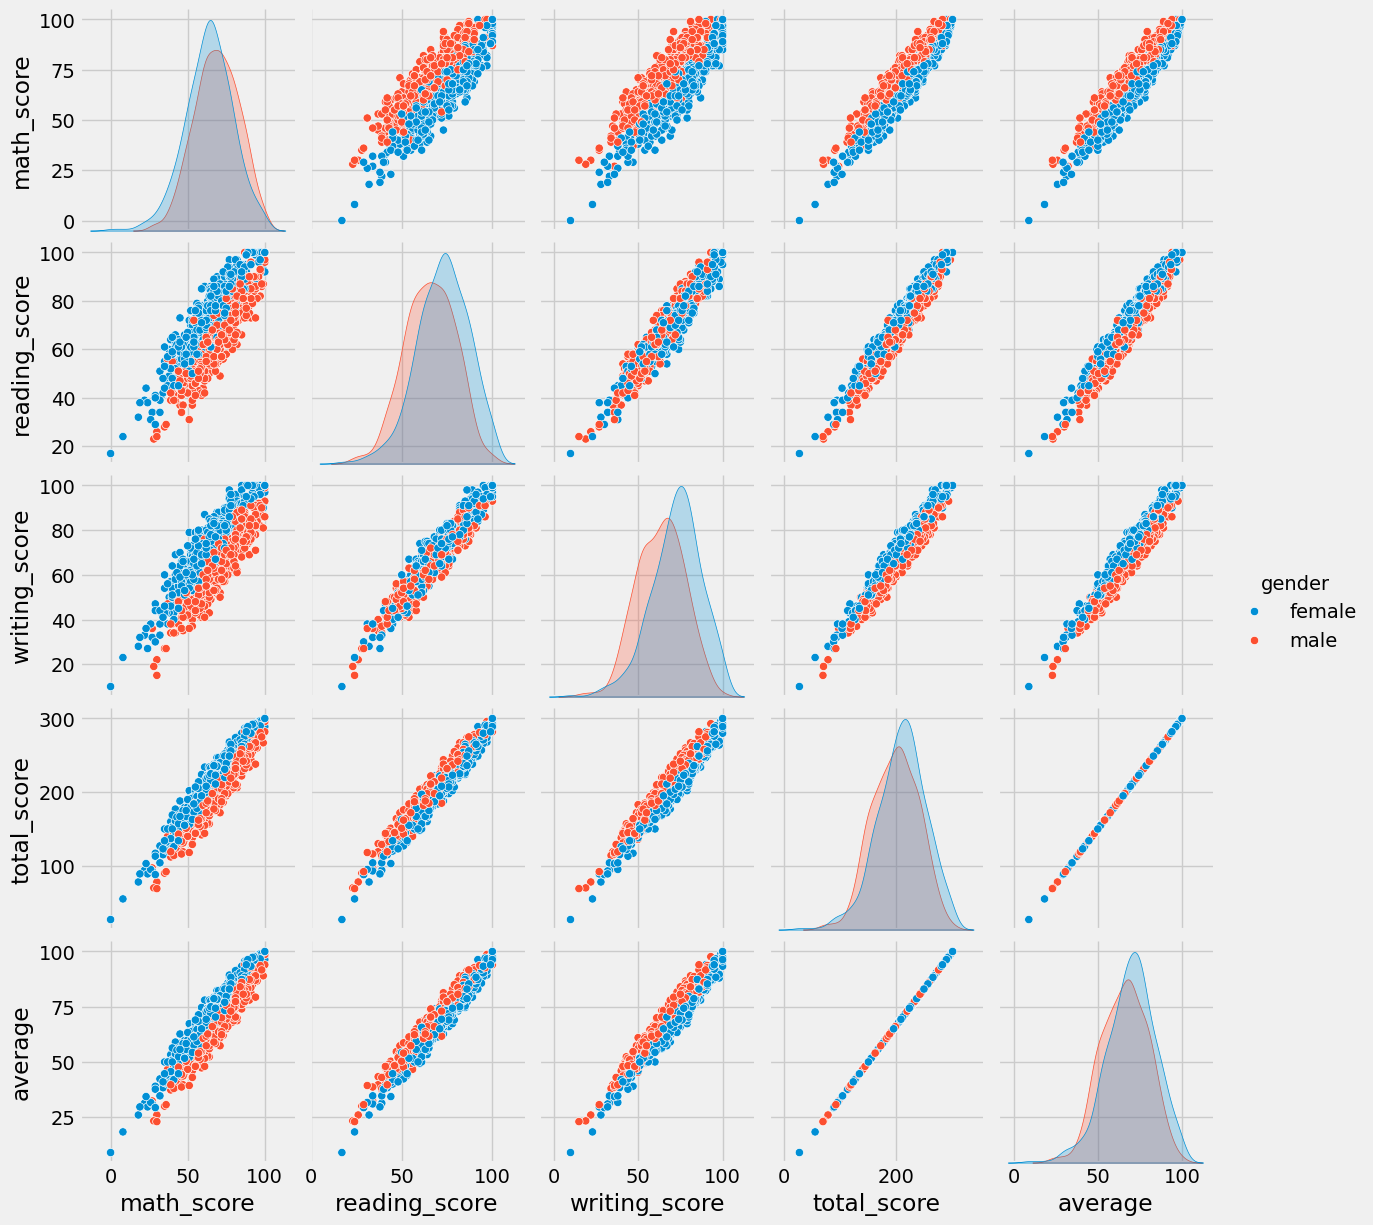

In [59]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.